In [ ]:
import pandas as pd,numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm,binom
import math

In [ ]:
path="/content/drive/MyDrive/walmart.csv"
data=pd.read_csv(path)

In [ ]:
data1=data.copy()
data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


###**General Analysis**

In [ ]:
data1.shape

(550068, 10)

In [ ]:
data1.size

5500680

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
datax=data1.describe()
datax

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


***Checking Null values***

In [ ]:
# data1['User_ID'].isnull().values.any()                           # Output =False
# data1['Product_ID'].isnull().values.any()                        # Output =False
# data1['Gender'].isnull().values.any()                            # Output =False
# data1['Age'].isnull().values.any()                               # Output =False
# data1['Occupation'].isnull().values.any()                        # Output =False
# data1['City_Category'].isnull().values.any()                     # Output =False
# data1['Stay_In_Current_City_Years'].isnull().values.any()        # Output =False
# data1['Marital_Status'].isnull().values.any()                    # Output =False
# data1['Product_Category'].isnull().values.any()                  # Output =False
# data1['Purchase'].isnull().values.any()                          # Output =False

***Unique customer***

In [ ]:
data1['User_ID'].nunique()

5891

***Unique Product***

In [ ]:
data1['Product_ID'].nunique()

3631

***Transaction count w.r.t different attributes***

In [ ]:
data1['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
data1['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
data100=data1['Age'].value_counts()
data100

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

[]

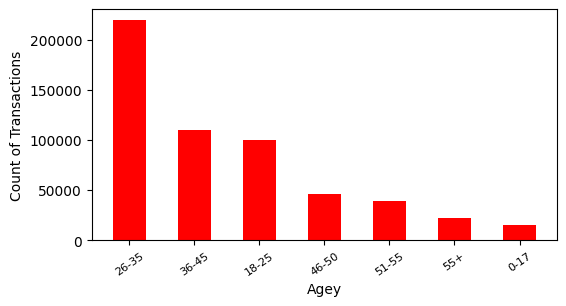

In [ ]:
plt.figure(figsize=(6,3))
x=data100.index
y=data100.values
plt.bar(x,y,data=data100,color='red',width=0.5)
plt.xticks(rotation=35,fontsize=8)
plt.xlabel('Agey',fontsize=10)
plt.ylabel('Count of Transactions',fontsize=10)
plt.plot()

In [ ]:
df=data1.copy()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


***Correlation***

<ipython-input-173-f759db061779>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data1.corr()


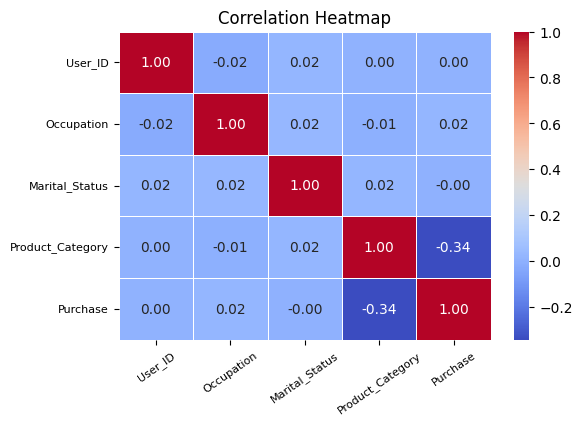

In [ ]:
correlation_matrix = data1.corr()
# Create a heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=35,fontsize=8)
plt.yticks(rotation=0,fontsize=8)
plt.title('Correlation Heatmap')
plt.show()

**Outlier detection**

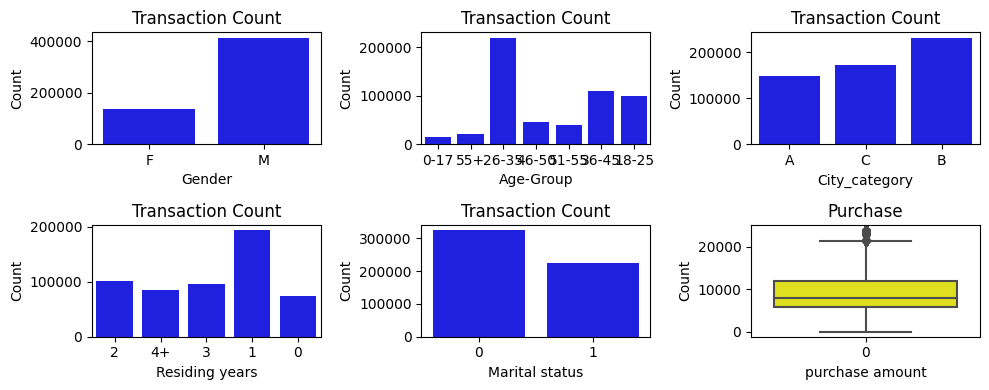

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 4))

sns.countplot(data=data1,x='Gender', ax=axes[0,0],color='Blue')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Transaction Count')

sns.countplot(data=data1,x='Age', ax=axes[0,1],color='Blue')
axes[0,1].set_xlabel('Age-Group')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Transaction Count')

sns.countplot(data=data1,x='City_Category', ax=axes[0,2],color='Blue')
axes[0,2].set_xlabel('City_category')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('Transaction Count')


sns.countplot(data=data1,x='Stay_In_Current_City_Years', ax=axes[1,0],color='Blue')
axes[1,0].set_xlabel('Residing years')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Transaction Count')

sns.countplot(data=data1,x='Marital_Status', ax=axes[1,1],color='Blue')
axes[1,1].set_xlabel('Marital status')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Transaction Count')

sns.boxplot(data=data1['Purchase'], ax=axes[1,2],color='Yellow')
axes[1,2].set_xlabel('purchase amount')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Purchase')


plt.tight_layout()

plt.show()

***Sample taken for iteration***

In [ ]:
n=1000

***Finding Z_score***

In [ ]:
probability1 = 0.90
probability2 = 0.95
probability3 = 0.99

# Find the z-score using the percent point function (ppf) for the standard normal distribution
z_1 = stats.norm.ppf(probability1)
z_2 = stats.norm.ppf(probability2)
z_3 = stats.norm.ppf(probability3)

# print("The z-score for a percentile of {} is {:.4f}".format(percentile1, z_score))
print('The z_score is for 90% is',round(z_1,4))
print('The z_score for 95% is',round(z_2,4))
print('The z_score for 99% is',round(z_3,4))

The z_score is for 90% is 1.2816
The z_score for 95% is 1.6449
The z_score for 99% is 2.3263


###**Population specific calculation**

In [ ]:
sample=[df['Purchase'].sample(1000).mean() for i in range(n)]

In [ ]:
mu=sum(sample)/n
print("Sample mean for population is",round(mu,2))

Sample mean for population is 9258.71


In [ ]:
df['Purchase'].mean()

9263.968712959126

Text(0.5, 1.0, 'Average Purchase Amount')

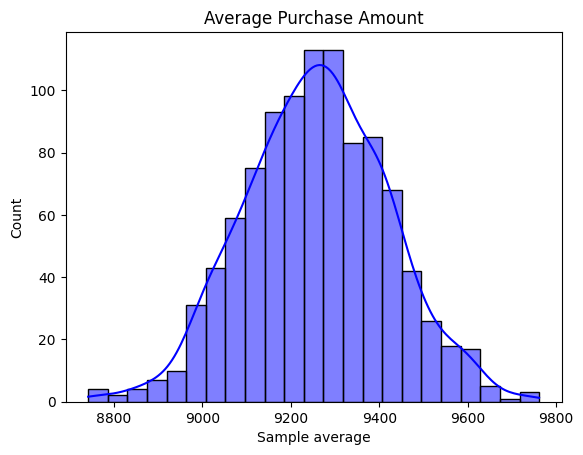

In [ ]:
sns.histplot(sample,kde=True,color="Blue")
plt.xlabel('Sample average')
plt.ylabel('Count')
plt.title('Average Purchase Amount')

In [ ]:
sigma=np.std(sample)
LL0=round(mu-z_1*(sigma/math.sqrt(n)),2)
UL0=round(mu+z_1*(sigma/math.sqrt(n)),2)
print("With 90% confidence we can say, average purchase amount lies between", LL0, 'And', UL0)
LL01=round(mu-z_2*(sigma/math.sqrt(n)),2)
UL01=round(mu+z_2*(sigma/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount lies between", LL01, 'And', UL01)
LL02=round(mu-z_3*(sigma/math.sqrt(n)),2)
UL02=round(mu+z_3*(sigma/math.sqrt(n)),2)
print("With 99% confidence we can say, average purchase amount lies between", LL02, 'And', UL02)

With 90% confidence we can say, average purchase amount lies between 9252.16 And 9265.27
With 95% confidence we can say, average purchase amount lies between 9250.3 And 9267.13
With 99% confidence we can say, average purchase amount lies between 9246.81 And 9270.61


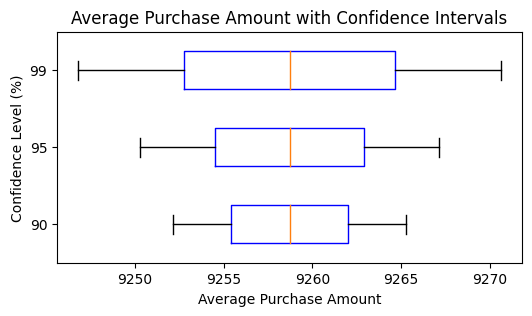

In [ ]:
plt.figure(figsize=(6,3))
confidence_levels = [90, 95, 99]
intervals = [(LL0,UL0), (LL01,UL01), (LL02,UL02)]
# Center point of each interval
center_points = [(lower + upper) / 2 for lower, upper in intervals]

box=plt.boxplot(intervals, vert=False, labels=confidence_levels, widths=0.5,boxprops=dict(color='blue'))
plt.xlabel('Average Purchase Amount')
plt.ylabel('Confidence Level (%)')
plt.title('Average Purchase Amount with Confidence Intervals')

plt.show()

###**Gender Specific calculation**

**Number of Male and Female customer in Sample**

In [ ]:
dataa1=data1.copy()

In [ ]:
dataa1.drop_duplicates(['User_ID'],keep='first',inplace=True)
dataa1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
dataa1['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

**Transactions Made by Male and Female**

In [ ]:
a=data1['Gender'].value_counts()
print(f"Transaction count for given Genders:\n{a}")

Transaction count for given Genders:
M    414259
F    135809
Name: Gender, dtype: int64


**CLT and Confidence Interval**

In [ ]:
data10=data1[data1['Gender']=='M']
data20=data1[data1['Gender']=='F']
data10.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


**for male**

In [ ]:
male_pur=[data10['Purchase'].sample(n).mean() for i in range(1000)]

In [ ]:
mu1=sum(male_pur)/n
print(mu1)

9430.210246000002


In [ ]:
data10['Purchase'].mean()

9437.526040472265

[]

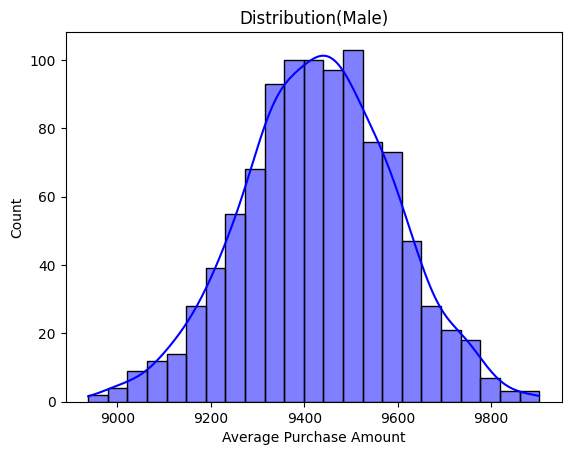

In [ ]:
sns.histplot(male_pur,kde=True,color='Blue')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Count')
plt.title('Distribution(Male)')
plt.plot()

In [ ]:
sigma1=np.std(male_pur)
LL1=round(mu1-z_1*(sigma1/math.sqrt(n)),2)
UL1=round(mu1+z_1*(sigma1/math.sqrt(n)),2)
print("With 90% confidence we can say, average purchase amount for male lies between", LL1, 'And', UL1)
LL11=round(mu1-z_2*(sigma1/math.sqrt(n)),2)
UL11=round(mu1+z_2*(sigma1/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for male lies between", LL11, 'And', UL11)
LL12=round(mu1-z_3*(sigma1/math.sqrt(n)),2)
UL12=round(mu1+z_3*(sigma1/math.sqrt(n)),2)
print("With 99% confidence we can say, average purchase amount for male lies between", LL12, 'And', UL12)

With 90% confidence we can say, average purchase amount for male lies between 9423.69 And 9436.73
With 95% confidence we can say, average purchase amount for male lies between 9421.84 And 9438.58
With 99% confidence we can say, average purchase amount for male lies between 9418.38 And 9442.04


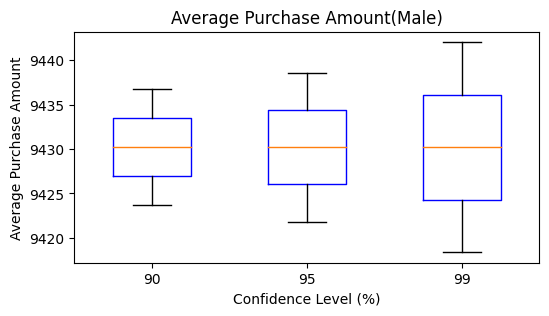

In [ ]:
plt.figure(figsize=(6,3))
confidence_levels = [90, 95, 99]
intervals = [(LL1,UL1), (LL11,UL11), (LL12,UL12)]
# Center point of each interval
center_points = [(lower + upper) / 2 for lower, upper in intervals]

box=plt.boxplot(intervals, vert=True, labels=confidence_levels, widths=0.5,boxprops=dict(color='blue'))
plt.xlabel('Confidence Level (%)')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount(Male)')

plt.show()

**for female**

In [ ]:
female_pur=[data20['Purchase'].sample(n).mean() for i in range(1000)]

In [ ]:
mu2=sum(female_pur)/n
print(mu2)

8740.221239999988


In [ ]:
data20['Purchase'].mean()

8734.565765155476

[]

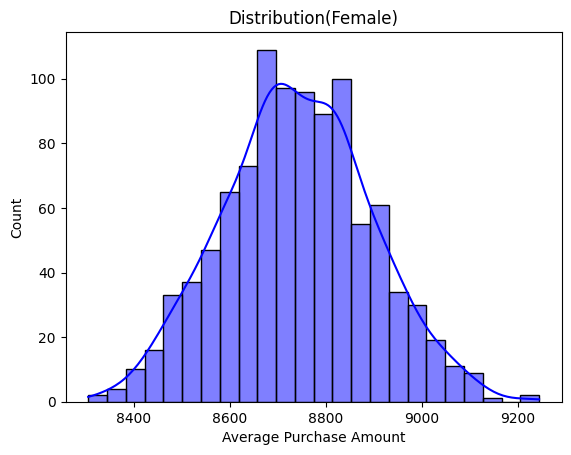

In [ ]:
sns.histplot(female_pur,kde=True,color='Blue')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Count')
plt.title('Distribution(Female)')
plt.plot()

In [ ]:
sigma2=np.std(female_pur)
LL2=round(mu2-z_1*(sigma2/math.sqrt(n)),2)
UL2=round(mu2+z_1*(sigma2/math.sqrt(n)),2)
print("With 90% confidence we can say, average purchase amount for female lies between", LL2, 'And', UL2)
LL21=round(mu2-z_2*(sigma2/math.sqrt(n)),2)
UL21=round(mu2+z_2*(sigma2/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for female lies between", LL21, 'And', UL21)
LL22=round(mu2-z_3*(sigma2/math.sqrt(n)),2)
UL22=round(mu2+z_3*(sigma2/math.sqrt(n)),2)
print("With 99% confidence we can say, average purchase amount for female lies between", LL22, 'And', UL22)

With 90% confidence we can say, average purchase amount for female lies between 8734.03 And 8746.41
With 95% confidence we can say, average purchase amount for female lies between 8732.28 And 8748.17
With 99% confidence we can say, average purchase amount for female lies between 8728.98 And 8751.46


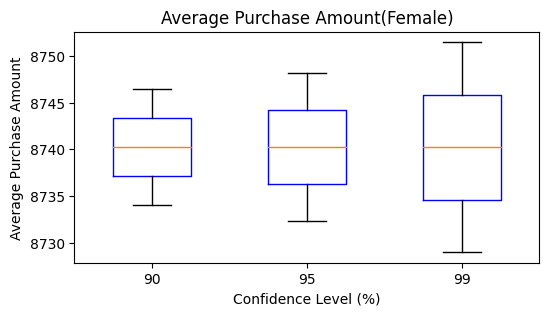

In [ ]:
plt.figure(figsize=(6,3))
confidence_levels = [90, 95, 99]
intervals = [(LL2,UL2), (LL21,UL21), (LL22,UL22)]
# Center point of each interval
center_points = [(lower + upper) / 2 for lower, upper in intervals]

box=plt.boxplot(intervals, vert=True, labels=confidence_levels, widths=0.5,boxprops=dict(color='blue'))
plt.xlabel('Confidence Level (%)')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount(Female)')

plt.show()

***Comaprison for both male and female***

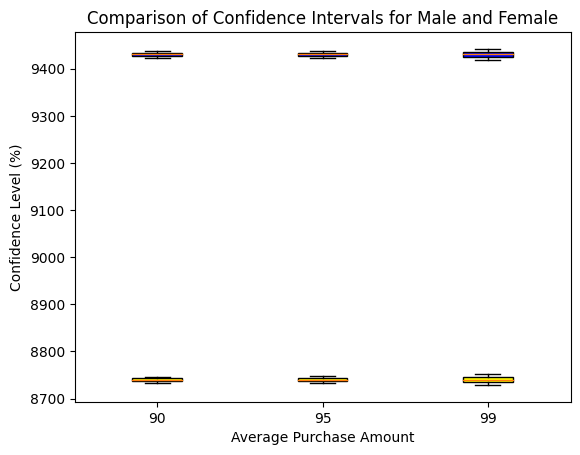

In [ ]:
confidence_levels = [90, 95, 99]
intervals = [(LL1,UL1), (LL11,UL11), (LL12,UL12)]
interval1 = [(LL2,UL2), (LL21,UL21), (LL22,UL22)]
positions = [1, 2, 3]
fig, ax = plt.subplots()
box1 = ax.boxplot(intervals, positions=positions, patch_artist=True)
box2 = ax.boxplot(interval1, positions=positions, patch_artist=True)

# Set colors for each box
colors1 = ['blue', 'blue', 'blue']
colors2 = ['Yellow', 'Yellow', 'Yellow']
for patch, color in zip(box1['boxes'], colors1):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors2):
    patch.set_facecolor(color)

# Set labels for the boxes
ax.set_xticks(positions)
ax.set_xticklabels(confidence_levels)

plt.xlabel('Average Purchase Amount')
plt.ylabel('Confidence Level (%)')
plt.title('Comparison of Confidence Intervals for Male and Female')

plt.show()


### **Marital Status vs Purchase**

In [ ]:
a0=data1['Marital_Status'].value_counts()
print(f"Transaction count for given Marital Status :\n{a0}")

Transaction count for given Marital Status :
0    324731
1    225337
Name: Marital_Status, dtype: int64


In [ ]:
data11=data1[data1['Marital_Status']==0]
data21=data1[data1['Marital_Status']==1]
data11.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


**for unmarried**

In [ ]:
unmarried_pur=[data11['Purchase'].sample(n).mean() for i in range(1000)]

In [ ]:
mu3=sum(unmarried_pur)/n
print(mu3)

9262.785403999998


In [ ]:
data11['Purchase'].mean()

9265.907618921507

[]

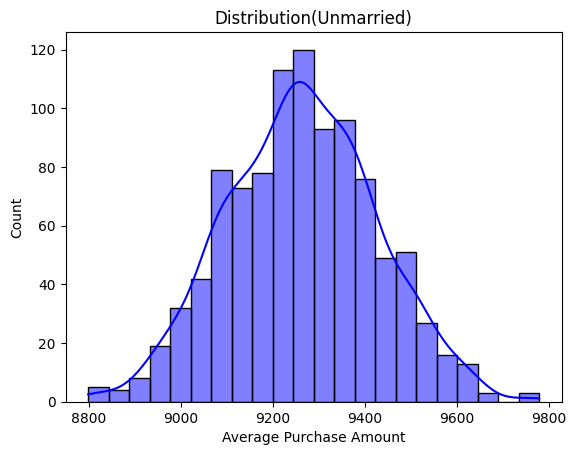

In [ ]:
sns.histplot(unmarried_pur,kde=True,color='Blue')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Count')
plt.title('Distribution(Unmarried)')
plt.plot()

In [ ]:
sigma3=np.std(unmarried_pur)
LL3=round(mu3-z_1*(sigma3/math.sqrt(n)),2)
UL3=round(mu3+z_1*(sigma3/math.sqrt(n)),2)
print("With 90% confidence we can say, average purchase amount for unmarried customers lies between", LL3, 'And', UL3)
LL31=round(mu3-z_2*(sigma3/math.sqrt(n)),2)
UL31=round(mu3+z_2*(sigma3/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for unmarried customers lies between", LL31, 'And', UL31)
LL32=round(mu3-z_3*(sigma3/math.sqrt(n)),2)
UL32=round(mu3+z_3*(sigma3/math.sqrt(n)),2)
print("With 99% confidence we can say, average purchase amount for unmarried customers lies between", LL32, 'And', UL32)

With 90% confidence we can say, average purchase amount for unmarried customers lies between 9256.23 And 9269.35
With 95% confidence we can say, average purchase amount for unmarried customers lies between 9254.37 And 9271.21
With 99% confidence we can say, average purchase amount for unmarried customers lies between 9250.88 And 9274.69


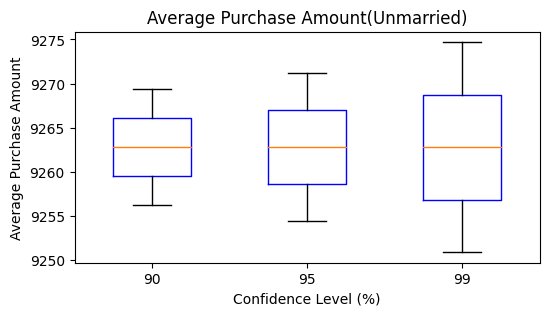

In [ ]:
plt.figure(figsize=(6,3))
confidence_levels = [90, 95, 99]
intervals = [(LL3,UL3), (LL31,UL31), (LL32,UL32)]
# Center point of each interval
center_points = [(lower + upper) / 2 for lower, upper in intervals]

box=plt.boxplot(intervals, vert=True, labels=confidence_levels, widths=0.5,boxprops=dict(color='blue'))
plt.xlabel('Confidence Level (%)')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount(Unmarried)')

plt.show()

**for married**

In [ ]:
data21.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254


In [ ]:
married_pur=[data21['Purchase'].sample(n).mean() for i in range(1000)]

In [ ]:
mu30=sum(married_pur)/n
print(mu30)

9264.327015999988


In [ ]:
data21['Purchase'].mean()

9261.174574082374

[]

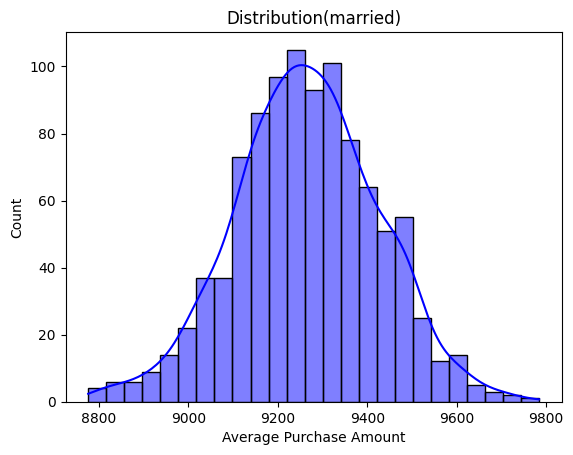

In [ ]:
sns.histplot(married_pur,kde=True,color='Blue')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Count')
plt.title('Distribution(married)')
plt.plot()

In [ ]:
sigma4=np.std(unmarried_pur)
LL4=round(mu30-z_1*(sigma4/math.sqrt(n)),2)
UL4=round(mu30+z_1*(sigma4/math.sqrt(n)),2)
print("With 90% confidence we can say, average purchase amount for married customers lies between", LL4, 'And', UL4)
LL41=round(mu30-z_2*(sigma4/math.sqrt(n)),2)
UL41=round(mu30+z_2*(sigma4/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for married customers lies between", LL41, 'And', UL41)
LL42=round(mu30-z_3*(sigma4/math.sqrt(n)),2)
UL42=round(mu30+z_3*(sigma4/math.sqrt(n)),2)
print("With 99% confidence we can say, average purchase amount for married customers lies between", LL42, 'And', UL42)

With 90% confidence we can say, average purchase amount for married customers lies between 9257.77 And 9270.89
With 95% confidence we can say, average purchase amount for married customers lies between 9255.91 And 9272.75
With 99% confidence we can say, average purchase amount for married customers lies between 9252.42 And 9276.24


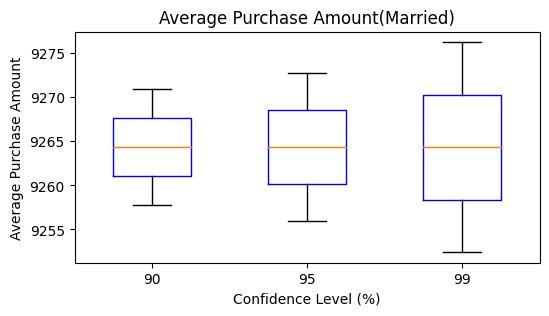

In [ ]:
plt.figure(figsize=(6,3))
confidence_levels = [90, 95, 99]
intervals = [(LL4,UL4), (LL41,UL41), (LL42,UL42)]
# Center point of each interval
center_points = [(lower + upper) / 2 for lower, upper in intervals]

box=plt.boxplot(intervals, vert=True, labels=confidence_levels, widths=0.5,boxprops=dict(color='blue'))
plt.xlabel('Confidence Level (%)')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount(Married)')

plt.show()

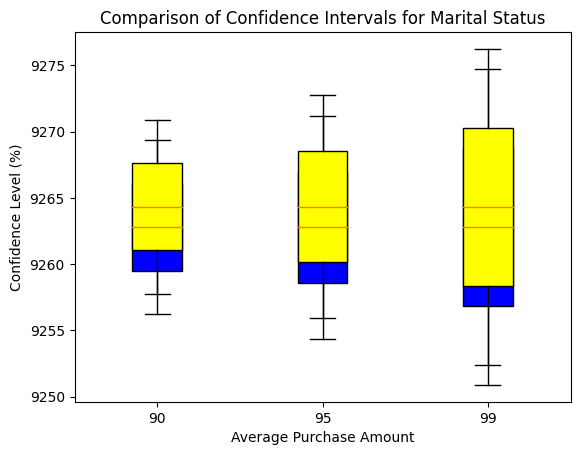

In [ ]:
confidence_levels = [90, 95, 99]
intervals = [(LL3,UL3), (LL31,UL31), (LL32,UL32)]
interval1 = [(LL4,UL4), (LL41,UL41), (LL42,UL42)]
positions = [1, 2, 3]
fig, ax = plt.subplots()
box1 = ax.boxplot(intervals, positions=positions, patch_artist=True)
box2 = ax.boxplot(interval1, positions=positions, patch_artist=True)

# Set colors for each box
colors1 = ['blue', 'blue', 'blue']
colors2 = ['Yellow', 'Yellow', 'Yellow']
for patch, color in zip(box1['boxes'], colors1):
    patch.set_facecolor(color)
for patch, color in zip(box2['boxes'], colors2):
    patch.set_facecolor(color)

# Set labels for the boxes
ax.set_xticks(positions)
ax.set_xticklabels(confidence_levels)

plt.xlabel('Average Purchase Amount')
plt.ylabel('Confidence Level (%)')
plt.title('Comparison of Confidence Intervals for Marital Status')

plt.show()

###**Age vs Purchase**

In [ ]:
data1['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
datas=data1[data1['Age']=='0-17']
datat=data1[data1['Age']=='18-25']
datau=data1[data1['Age']=='26-35']
datav=data1[data1['Age']=='36-45']
dataw=data1[data1['Age']=='46-50']
datay=data1[data1['Age']=='51-55']
dataz=data1[data1['Age']=='55+']

In [ ]:
age1=[datas['Purchase'].sample(n).mean() for i in range(1000)]
age2=[datat['Purchase'].sample(n).mean() for i in range(1000)]
age3=[datau['Purchase'].sample(n).mean() for i in range(1000)]
age4=[datav['Purchase'].sample(n).mean() for i in range(1000)]
age5=[dataw['Purchase'].sample(n).mean() for i in range(1000)]
age6=[datay['Purchase'].sample(n).mean() for i in range(1000)]
age7=[dataz['Purchase'].sample(n).mean() for i in range(1000)]

In [ ]:
mus=sum(age1)/n
mut=sum(age2)/n
muu=sum(age3)/n
muv=sum(age4)/n
muw=sum(age5)/n
muy=sum(age6)/n
muz=sum(age7)/n
print("Sample average for '0-17' years is",round(mus,2))
print("Sample average for '18-25' years is",round(mut,2))
print("Sample average for '26-35' years is",round(muu,2))
print("Sample average for '36-45' years is",round(muv,2))
print("Sample average for '46-50' years is",round(muw,2))
print("Sample average for '51-55' years is",round(muy,2))
print("Sample average for '55+' years is",round(muz,2))


Sample average for '0-17' years is 8937.75
Sample average for '18-25' years is 9167.1
Sample average for '26-35' years is 9256.48
Sample average for '36-45' years is 9343.89
Sample average for '46-50' years is 9209.04
Sample average for '51-55' years is 9539.84
Sample average for '55+' years is 9339.54


In [ ]:
p1=datas['Purchase'].mean()
p2=datat['Purchase'].mean()
p3=datau['Purchase'].mean()
p4=datav['Purchase'].mean()
p5=dataw['Purchase'].mean()
p6=datay['Purchase'].mean()
p7=dataz['Purchase'].mean()
print("Population average for '0-17' years is",round(p1,2))
print("Population average for '18-25' years is",round(p2,2))
print("Population average for '26-35' years is",round(p3,2))
print("Population average for '36-45' years is",round(p4,2))
print("Population average for '46-50' years is",round(p5,2))
print("Population average for '51-55' years is",round(p6,2))
print("Population average for '55+' years is",round(p7,2))


Population average for '0-17' years is 8933.46
Population average for '18-25' years is 9169.66
Population average for '26-35' years is 9252.69
Population average for '36-45' years is 9331.35
Population average for '46-50' years is 9208.63
Population average for '51-55' years is 9534.81
Population average for '55+' years is 9336.28


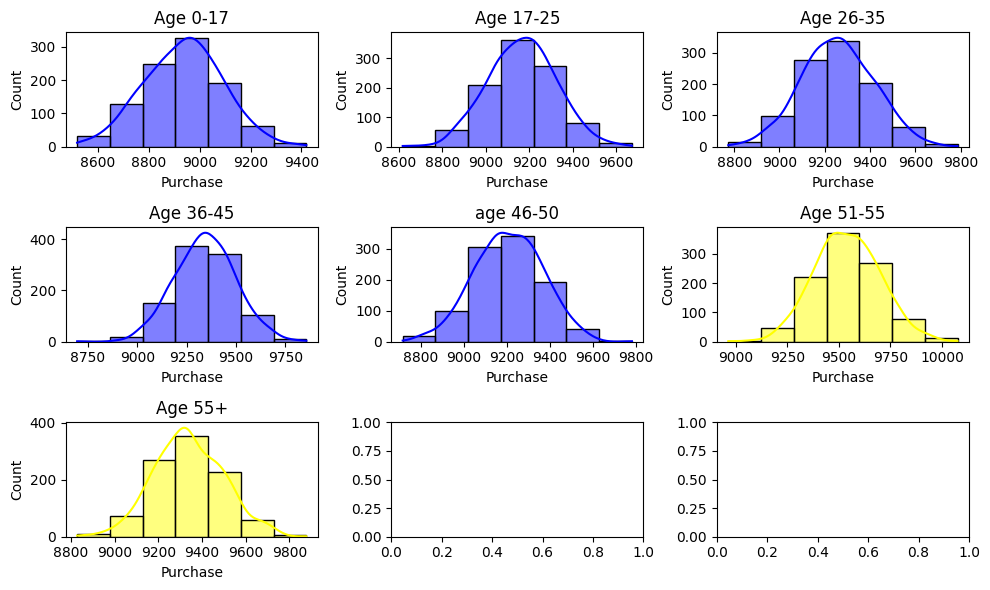

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 6))

sns.histplot(age1,kde=True, bins=7, ax=axes[0,0],color='Blue')
axes[0,0].set_xlabel('Purchase')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Age 0-17')

sns.histplot(age2, bins=7,kde=True, ax=axes[0,1],color='Blue')
axes[0,1].set_xlabel('Purchase')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Age 17-25')

sns.histplot(age3, bins=7,kde=True, ax=axes[0,2],color='Blue')
axes[0,2].set_xlabel('Purchase')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('Age 26-35')

sns.histplot(age4, bins=7,kde=True, ax=axes[1,0],color='Blue')
axes[1,0].set_xlabel('Purchase')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Age 36-45')

sns.histplot(age5,kde=True,bins=7, ax=axes[1,1],color='Blue')
axes[1,1].set_xlabel('Purchase')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('age 46-50')

sns.histplot(age6, bins=7,kde=True, ax=axes[1,2],color='Yellow')
axes[1,2].set_xlabel('Purchase')
axes[1,2].set_ylabel('Count')
axes[1,2].set_title('Age 51-55')

sns.histplot(age7, bins=7,kde=True, ax=axes[2,0],color='Yellow')
axes[2,0].set_xlabel('Purchase')
axes[2,0].set_ylabel('Count')
axes[2,0].set_title('Age 55+')

# Adjust subplot layout
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
sigmas=np.std(age1)
sigmat=np.std(age2)
sigmau=np.std(age3)
sigmav=np.std(age4)
sigmaw=np.std(age5)
sigmay=np.std(age6)
sigmaz=np.std(age7)

In [ ]:
LLs=round(mus-z_2*(sigmas/math.sqrt(n)),2)
ULs=round(mus+z_2*(sigmas/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for customers aged 0-17 lies between", LLs, 'And', ULs)
LLt=round(mut-z_2*(sigmas/math.sqrt(n)),2)
ULt=round(mut+z_2*(sigmas/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for customers aged 18-25 lies between", LLt, 'And', ULt)
LLu=round(muu-z_2*(sigmas/math.sqrt(n)),2)
ULu=round(muu+z_2*(sigmas/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for customers aged 26-35 lies between", LLu, 'And', ULu)
LLv=round(muv-z_2*(sigmas/math.sqrt(n)),2)
ULv=round(muv+z_2*(sigmas/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for customers aged 36-45 lies between", LLv, 'And', ULv)
LLw=round(muw-z_2*(sigmas/math.sqrt(n)),2)
ULw=round(muw+z_2*(sigmas/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for customers aged 46-50 lies between", LLw, 'And', ULw)
LLy=round(muy-z_2*(sigmas/math.sqrt(n)),2)
ULy=round(muy+z_2*(sigmas/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for customers aged 51-55 lies between", LLy, 'And', ULy)
LLz=round(muz-z_2*(sigmas/math.sqrt(n)),2)
ULz=round(muz+z_2*(sigmas/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for customers aged 55+ lies between", LLz, 'And', ULz)

With 95% confidence we can say, average purchase amount for customers aged 0-17 lies between 8929.68 And 8945.81
With 95% confidence we can say, average purchase amount for customers aged 18-25 lies between 9159.03 And 9175.16
With 95% confidence we can say, average purchase amount for customers aged 26-35 lies between 9248.42 And 9264.55
With 95% confidence we can say, average purchase amount for customers aged 36-45 lies between 9335.82 And 9351.95
With 95% confidence we can say, average purchase amount for customers aged 46-50 lies between 9200.98 And 9217.11
With 95% confidence we can say, average purchase amount for customers aged 51-55 lies between 9531.78 And 9547.9
With 95% confidence we can say, average purchase amount for customers aged 55+ lies between 9331.47 And 9347.6


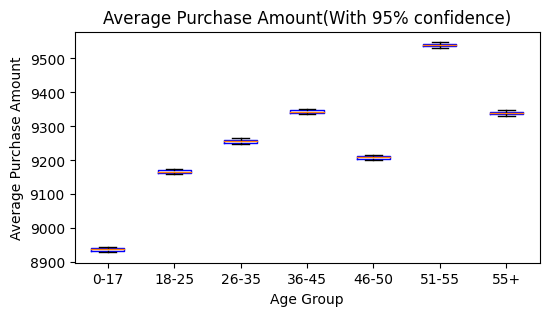

In [ ]:
plt.figure(figsize=(6,3))
confidence_levels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
intervals = [
    (LLs,ULs),
    (LLt,ULt),
    (LLu,ULu),
    (LLv,ULv),
    (LLw,ULw),
    (LLy,ULy),
    (LLz,ULz)
]
# Center point of each interval
center_points = [(lower + upper) / 2 for lower, upper in intervals]

box=plt.boxplot(intervals, vert=True, labels=confidence_levels, widths=0.5,boxprops=dict(color='blue'))
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount(With 95% confidence)')

plt.show()

###**City vs Purchase**

In [ ]:
datac=data1[data1['City_Category']=='A']
datac0=data1[data1['City_Category']=='B']
datac1=data1[data1['City_Category']=='C']

In [ ]:
a=[datac['Purchase'].sample(n).mean() for i in range(1000)]
b=[datac0['Purchase'].sample(n).mean() for i in range(1000)]
c=[datac1['Purchase'].sample(n).mean() for i in range(1000)]

In [ ]:
mua=sum(a)/n
mub=sum(b)/n
muc=sum(c)/n
print("Sample average for 'City A'  is",round(mua,2))
print("Sample average for 'City B' is",round(mub,2))
print("Sample average for 'City C' years is",round(muc,2))

Sample average for 'City A'  is 8913.06
Sample average for 'City B' is 9152.33
Sample average for 'City C' years is 9713.94


In [ ]:
c0=datac['Purchase'].mean()
c1=datac0['Purchase'].mean()
c2=datac1['Purchase'].mean()
print("Population average for 'City A' years is",round(c0,2))
print("Population average for 'City B' years is",round(c1,2))
print("Population average for 'City C' years is",round(c2,2))

Population average for 'City A' years is 8911.94
Population average for 'City B' years is 9151.3
Population average for 'City C' years is 9719.92


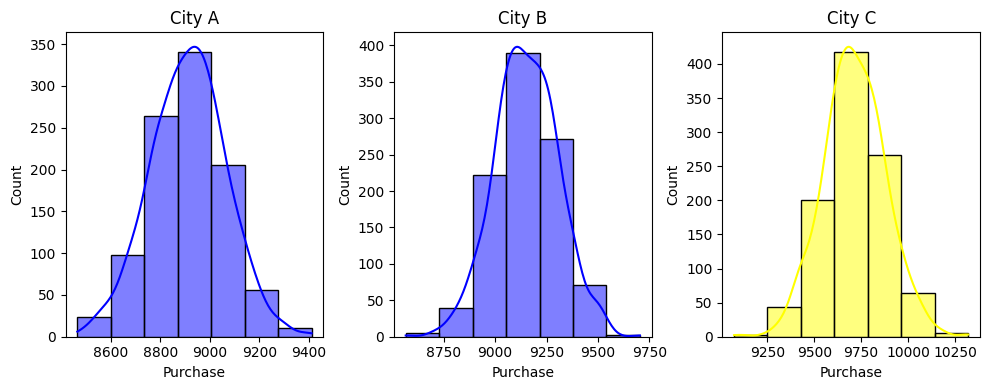

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

sns.histplot(a,kde=True, bins=7, ax=axes[0],color='Blue')
axes[0].set_xlabel('Purchase')
axes[0].set_ylabel('Count')
axes[0].set_title('City A')

sns.histplot(b,kde=True, bins=7, ax=axes[1],color='Blue')
axes[1].set_xlabel('Purchase')
axes[1].set_ylabel('Count')
axes[1].set_title('City B')

sns.histplot(c,kde=True, bins=7, ax=axes[2],color='Yellow')
axes[2].set_xlabel('Purchase')
axes[2].set_ylabel('Count')
axes[2].set_title('City C')

# Adjust subplot layout
plt.tight_layout()

# Show the subplots
plt.show()

In [ ]:
sigmaa=np.std(a)
sigmab=np.std(b)
sigmac=np.std(c)

In [ ]:
LLa=round(mua-z_2*(sigmaa/math.sqrt(n)),2)
ULa=round(mua+z_2*(sigmaa/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for City A customers lies between", LLa, 'And', ULa)
LLb=round(mub-z_2*(sigmab/math.sqrt(n)),2)
ULb=round(mub+z_2*(sigmab/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for City B customers lies between", LLb, 'And', ULb)
LLc=round(muc-z_2*(sigmac/math.sqrt(n)),2)
ULc=round(muc+z_2*(sigmac/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for City C customers lies between", LLc, 'And', ULc)

With 95% confidence we can say, average purchase amount for City A customers lies between 8905.15 And 8920.97
With 95% confidence we can say, average purchase amount for City B customers lies between 9144.28 And 9160.37
With 95% confidence we can say, average purchase amount for City C customers lies between 9705.3 And 9722.57


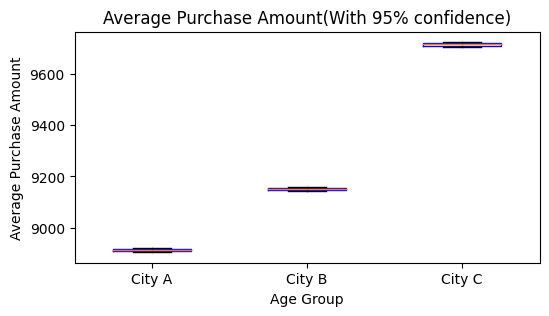

In [ ]:
plt.figure(figsize=(6,3))
confidence_levels = ['City A', 'City B', 'City C']
intervals = [
    (LLa,ULa),
    (LLb,ULb),
    (LLc,ULc),
]
# Center point of each interval
center_points = [(lower + upper) / 2 for lower, upper in intervals]

box=plt.boxplot(intervals, vert=True, labels=confidence_levels, widths=0.5,boxprops=dict(color='blue'))
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount(With 95% confidence)')

plt.show()

###**Residing since vs purchase**

In [ ]:
data1['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
datal0=data1[data1['Stay_In_Current_City_Years']=='0']
datal1=data1[data1['Stay_In_Current_City_Years']=='1']
datal2=data1[data1['Stay_In_Current_City_Years']=='2']
datal3=data1[data1['Stay_In_Current_City_Years']=='3']
datal4=data1[data1['Stay_In_Current_City_Years']=='4+']

In [ ]:
l0=[datal0['Purchase'].sample(n).mean() for i in range(1000)]
l1=[datal1['Purchase'].sample(n).mean() for i in range(1000)]
l2=[datal2['Purchase'].sample(n).mean() for i in range(1000)]
l3=[datal3['Purchase'].sample(n).mean() for i in range(1000)]
l4=[datal4['Purchase'].sample(n).mean() for i in range(1000)]

In [ ]:
mul0=sum(l0)/n
mul1=sum(l1)/n
mul2=sum(l2)/n
mul3=sum(l3)/n
mul4=sum(l4)/n
print("Sample average for '>0' years of residing is",round(mul0,2))
print("Sample average for '1' years of residing is",round(mul1,2))
print("Sample average for '2'  years of residing is",round(mul2,2))
print("Sample average for '3'  years of residing is",round(mul3,2))
print("Sample average for '4+'  years of residing is",round(mul4,2))

Sample average for '>0' years of residing is 9173.87
Sample average for '1' years of residing is 9252.24
Sample average for '2'  years of residing is 9321.93
Sample average for '3'  years of residing is 9282.82
Sample average for '4+'  years of residing is 9273.83


In [ ]:
l00=datal0['Purchase'].mean()
l01=datal1['Purchase'].mean()
l02=datal2['Purchase'].mean()
l03=datal3['Purchase'].mean()
l04=datal4['Purchase'].mean()
print("Population average for '>0' years of residing is",round(l00,2))
print("Population average for '1' years of residing is",round(l01,2))
print("Population average for '2'  years of residing is",round(l02,2))
print("Population average for '3'  years of residing is",round(l03,2))
print("Population average for '4+'  years of residing is",round(l04,2))

Population average for '>0' years of residing is 9180.08
Population average for '1' years of residing is 9250.15
Population average for '2'  years of residing is 9320.43
Population average for '3'  years of residing is 9286.9
Population average for '4+'  years of residing is 9275.6


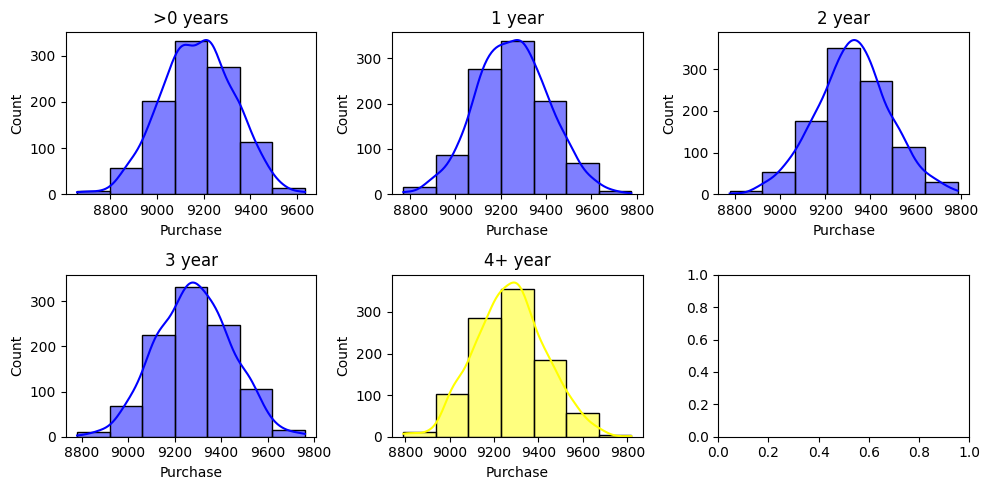

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

sns.histplot(l0,kde=True, bins=7, ax=axes[0,0],color='Blue')
axes[0,0].set_xlabel('Purchase')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('>0 years')

sns.histplot(l1, bins=7,kde=True, ax=axes[0,1],color='Blue')
axes[0,1].set_xlabel('Purchase')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('1 year')

sns.histplot(l2, bins=7,kde=True, ax=axes[0,2],color='Blue')
axes[0,2].set_xlabel('Purchase')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('2 year')

sns.histplot(l3, bins=7,kde=True, ax=axes[1,0],color='Blue')
axes[1,0].set_xlabel('Purchase')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('3 year')

sns.histplot(l4,kde=True,bins=7, ax=axes[1,1],color='Yellow')
axes[1,1].set_xlabel('Purchase')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('4+ year')

plt.tight_layout()

plt.show()

In [ ]:
sigmal0=np.std(l0)
sigmal1=np.std(l1)
sigmal2=np.std(l2)
sigmal3=np.std(l3)
sigmal4=np.std(l4)

In [ ]:
LLl0=round(mul0-z_2*(sigmal0/math.sqrt(n)),2)
ULl0=round(mul0+z_2*(sigmal0/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for customers residing for >0 years lies between", LLl0, 'And', ULl0)
LLl1=round(mul1-z_2*(sigmal1/math.sqrt(n)),2)
ULl1=round(mul1+z_2*(sigmal1/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for customers residing for 1 year lies between", LLl1, 'And', ULl1)
LLl2=round(mul2-z_2*(sigmal2/math.sqrt(n)),2)
ULl2=round(mul2+z_2*(sigmal2/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for  customers residing for 2 years lies between", LLl2, 'And', ULl2)
LLl3=round(mul3-z_2*(sigmal3/math.sqrt(n)),2)
ULl3=round(mul3+z_2*(sigmal3/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for  customers residing for 3 years lies between", LLl3, 'And', ULl3)
LLl4=round(mul4-z_2*(sigmal4/math.sqrt(n)),2)
ULl4=round(mul4+z_2*(sigmal4/math.sqrt(n)),2)
print("With 95% confidence we can say, average purchase amount for  customers residing for 4+ years lies between", LLl4, 'And', ULl4)

With 95% confidence we can say, average purchase amount for customers residing for >0 years lies between 9165.79 And 9181.95
With 95% confidence we can say, average purchase amount for customers residing for 1 year lies between 9244.0 And 9260.48
With 95% confidence we can say, average purchase amount for  customers residing for 2 years lies between 9313.47 And 9330.4
With 95% confidence we can say, average purchase amount for  customers residing for 3 years lies between 9274.51 And 9291.13
With 95% confidence we can say, average purchase amount for  customers residing for 4+ years lies between 9265.63 And 9282.02


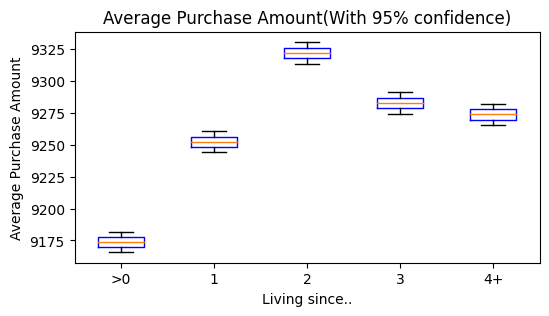

In [ ]:
plt.figure(figsize=(6,3))
confidence_levels = ['>0', '1', '2', '3', '4+']
intervals = [
    (LLl0,ULl0),
    (LLl1,ULl1),
    (LLl2,ULl2),
    (LLl3,ULl3),
    (LLl4,ULl4),
]
# Center point of each interval
center_points = [(lower + upper) / 2 for lower, upper in intervals]

box=plt.boxplot(intervals, vert=True, labels=confidence_levels, widths=0.5,boxprops=dict(color='blue'))
plt.xlabel('Living since..')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount(With 95% confidence)')

plt.show()